## TITANIC Prediction

This project is build by Suryansh Shrivastava for Course Project of "Deep Learning with PyTorch: Zero to GANs" of Jovian.ai

In [150]:
# Importing Necessary Modules
import numpy as np
import pandas as pd       
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()    
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import jovian 

## Reading and cleaning the input data

We first read the CSV input file using Pandas.
Next, we remove irrelevant entries, and prepare the data for our neural network.

In [112]:
# Read the CSV input file and show first 5 rows
df_train = pd.read_csv('../input/train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# Shape of Dataset
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [114]:
# Datatypes of Dataset
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId - Id of each passenger.

Survived - Survival (0 = No, 1 = Yes)

Pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3

Name - Full name and title of each passenger.

Sex - Sex (male or female)

Age - Age in years

SibSp - # of siblings / spouses aboard the Titanic

Parch - # of parents / children aboard the Titanic

Ticket - Ticket number

Fare - Passenger fare

Cabin - Cabin number

Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Our numeric features are:

Age
SibSp
Parch
Fare

## Our categorical features are:

Survived
Sex
Embarked
Ordinal:

Pclass
Alphanumeric:

Cabin
Ticket
Now inspect how many missing values are in each column.

In [115]:
# Info of Dataset
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Only 22.9% of the rows in the training data set contain an entry for Cabin
Age contains a fair amount of missing data
Embarked which has 2 missing entries in the training set
1 missing value in the Fare column in the test set.
Looking at some more details of the training data.

In [116]:
# Dataset describe
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analysing the Data

We will now look at how the features contribute towards survival and make some assumptions based off of the knowledge of the problem. I'm going to go over each column and share my thoughts on what we know so far.

Passengerid - It will not play a part in who survives, so can be excluded.

Survived - This is our target, so we want to know how other features affect this outcome.

Pclass - A categorical variable that is likely to play a part in who survives.

Name - Likely won't play a part in who survives, however the title may do.

Sex - A categorical variable that is likely to play a part in who survives.

Age - A numerical variable that is likely to play a part in who survives. We should fill in the blank rows

SibSp - A numerical variable that could play a small part in who survives.

Parch - A numerical variable that could play a small part in who survives.

Ticket - A feature that is unlikely to play a part in who survives, but may have some information in it.

Fare - A numerical variable that could play a part in who survives.

Cabin - Has a lot of missing values, but might be able to extract some information.

Embarked - A categorical feature that could play a small part in who survives. Should fill in the blank rows.

It is likely that Sex, Age and Pclass will be the main features that contribute towards survival, from our background intuition. Lets start there.

In [117]:
# Setting Graph configuration
sns.set_style("darkgrid")

numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

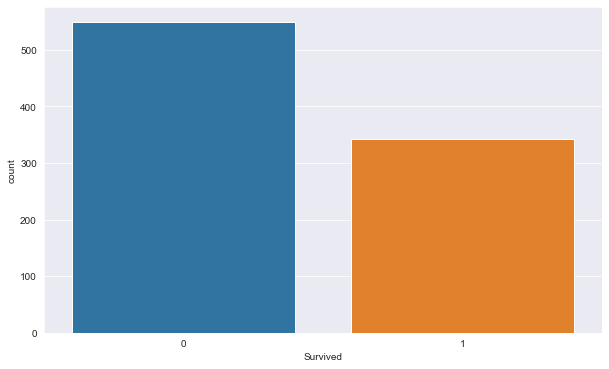

In [118]:
# Survival Graph
plt.figure(figsize=(10, 6))
sns.countplot(x="Survived", data=df_train)
plt.show()

In [119]:
# No of Survived 
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Target outcomes are not skewed, therefore no specific evaluation metrics are needed.
Survival rate of 38.4% on average.

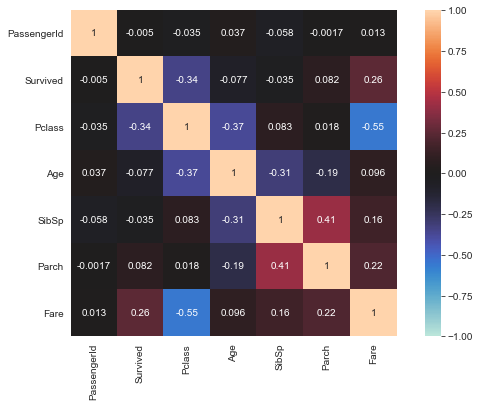

In [120]:
# Heatmap for Collinearity
plt.figure(figsize=(10, 6))
corr = df_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    square=True
)
plt.show()

No clearly (multi)collinear features within data.

In [121]:
# Numerical Plot 
def numerical_plots(feature_name):
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    sns.boxplot(x=df_train[feature_name], ax=axs[0])
    sns.distplot(df_train[feature_name], bins=10, kde=True, ax=axs[1])
    plt.show()

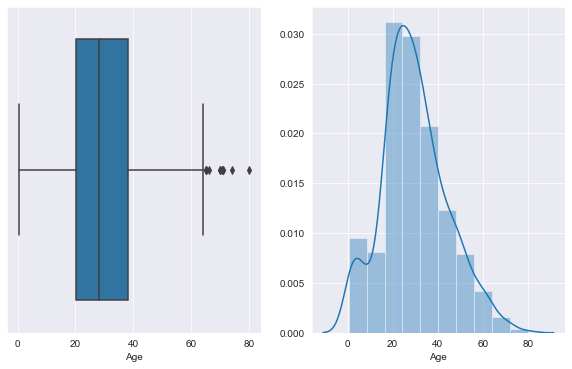

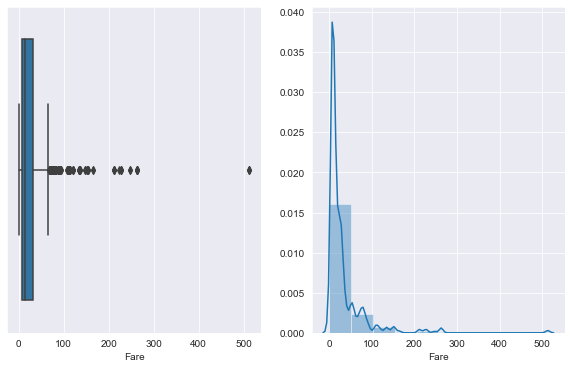

In [122]:
for feature in numerical_features:
    numerical_plots(feature)

Numerical features should be normalised if not banded as they are significantly skewed.

In [123]:
# Categorical Plot
def categorical_plots(feature_name):
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(x=feature_name, data=df_train, ax=axs[0])
    sns.countplot(x=feature_name, hue="Survived", data=df_train, ax=axs[1])
    plt.show()

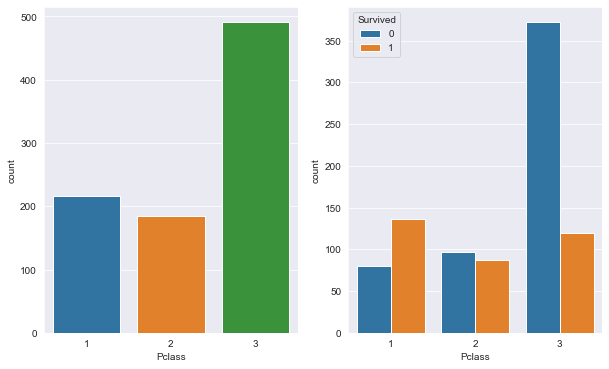

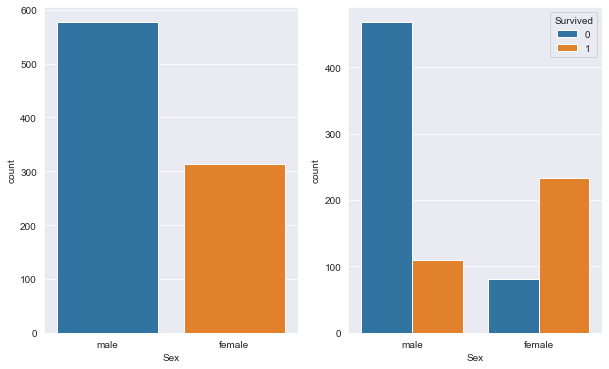

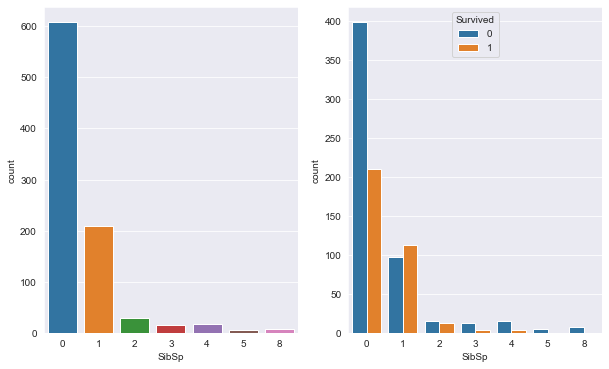

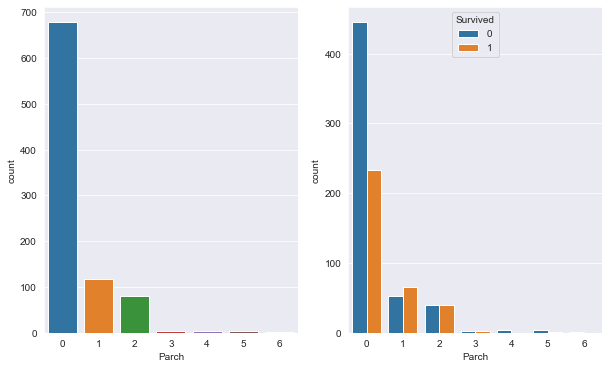

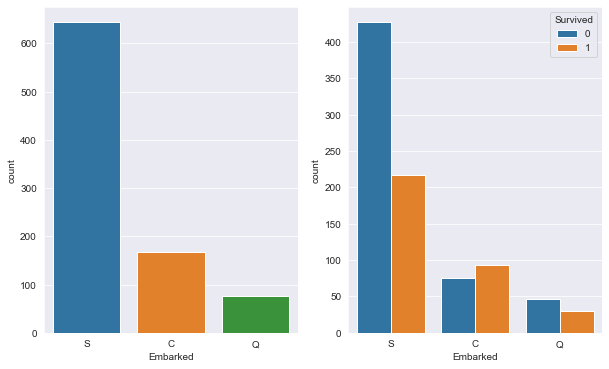

In [124]:
for feature in categorical_features:
    categorical_plots(feature)

In [125]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


A woman is almost 4 times as likely to survive as a man
Clear relationship between sex and survival

In [126]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Over half of the passengers in Pclass=1 survived, less than a quarter of those in Pclass=3 did.
Above table and previous plots suggest that there is a realtionship between 'Pclass'.

C:\Users\surya\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


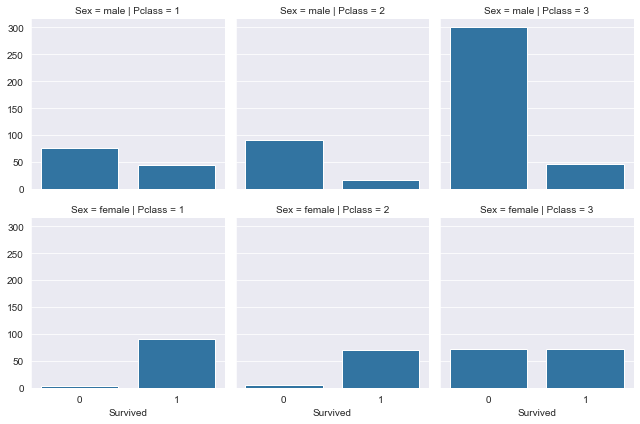

In [127]:
grid = sns.FacetGrid(df_train, col='Pclass', row='Sex')
grid.map(sns.countplot, 'Survived')
plt.show()

Overwhelming majority of women in Classes 1 and 2 survived. Half did in class 3.
Across all 3 classes, men survived less of the time, especially in the class 3 where the majority did not survive.

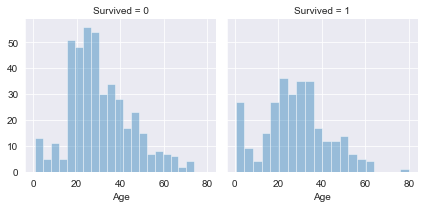

In [128]:
grid = sns.FacetGrid(df_train, col='Survived')
grid.map(sns.distplot, 'Age', bins=20, kde=False)
plt.show()

Not perfectly clear as to what is going on here.
Can infer that generally very elderly people did not survive and younger passengers did.

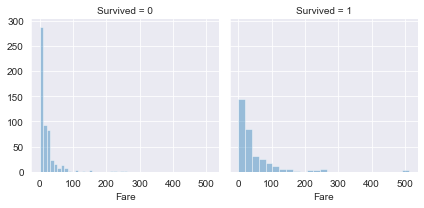

In [129]:
grid = sns.FacetGrid(df_train, col='Survived')
grid.map(sns.distplot, 'Fare', bins=25, kde=False)
plt.show()

Typically those who paid a higher Fare for their ticket were also in a higher class.

In [130]:
# We can't do anything with the Name, Ticket number, and Cabin, so we drop them.
df_train = df_train.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [131]:
# To make 'Sex' numeric, we replace 'female' by 0 and 'male' by 1
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1}).astype(int) 

In [132]:
# We replace 'Embarked' by three dummy variables 'Embarked_S', 'Embarked_C', and 'Embarked Q',
# which are 1 if the person embarked there, and 0 otherwise.
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], prefix='Embarked')], axis=1)
df_train = df_train.drop('Embarked', axis=1)

In [133]:
# We normalize the age and the fare by subtracting their mean and dividing by the standard deviation
age_mean = df_train['Age'].mean()
age_std = df_train['Age'].std()
df_train['Age'] = (df_train['Age'] - age_mean) / age_std

fare_mean = df_train['Fare'].mean()
fare_std = df_train['Fare'].std()
df_train['Fare'] = (df_train['Fare'] - fare_mean) / fare_std

In [134]:
# In many cases, the 'Age' is missing - which can cause problems. Let's look how bad it is:
print("Number of missing 'Age' values: {:d}".format(df_train['Age'].isnull().sum()))

# A simple method to handle these missing values is to replace them by the mean age.
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

Number of missing 'Age' values: 177


In [135]:
# With that, we're almost ready for training
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.530005,1,0,-0.502163,0,0,1
1,1,1,0,0.571430,1,0,0.786404,1,0,0
2,1,3,0,-0.254646,0,0,-0.488580,0,0,1
3,1,1,0,0.364911,1,0,0.420494,0,0,1
4,0,3,1,0.364911,0,0,-0.486064,0,0,1


In [136]:
# Finally, we convert the Pandas dataframe to a NumPy array, and split it into a training and test set
X_train = df_train.drop('Survived', axis=1).values
y_train = df_train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [137]:
# We'll build a classifier with two classes: "survived" and "didn't survive",
# so we create the according labels
labels_train = (np.arange(2) == y_train[:,None]).astype(np.float32)
labels_test = (np.arange(2) == y_test[:,None]).astype(np.float32)

## Define TensorFlow model
In a first step, we define how our neural network will look.
We create a network with 2 hidden layers with ReLU activations, and an output layer with softmax.
We use dropout for regularization. 

In [138]:
inputs = tf.placeholder(tf.float32, shape=(None, X_train.shape[1]), name='inputs')
label = tf.placeholder(tf.float32, shape=(None, 2), name='labels')

# First layer
hid1_size = 128
w1 = tf.Variable(tf.random_normal([hid1_size, X_train.shape[1]], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(inputs)), b1)), keep_prob=0.5)

# Second layer
hid2_size = 256
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)

# Output layer
wo = tf.Variable(tf.random_normal([2, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([2, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))

The output is a softmax output, and we train it with the cross entropy loss.
We further define functions which calculate the predicted label, and the accuracy of the network.

In [139]:
# Loss function and optimizer
lr = tf.placeholder(tf.float32, shape=(), name='learning_rate')
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=yo, labels=label))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

# Prediction
pred = tf.nn.softmax(yo)
pred_label = tf.argmax(pred, 1)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

## Train the network!

Finally, we are ready to train our network. Let's initialize TensorFlow and start training.

In [140]:
# Create operation which will initialize all variables
init = tf.global_variables_initializer()

# Configure GPU not to use all memory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Start a new tensorflow session and initialize variables
sess = tf.InteractiveSession(config=config)
sess.run(init)

C:\Users\surya\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [141]:
# This is the main training loop: we train for 50 epochs with a learning rate of 0.05 and another 
# 50 epochs with a smaller learning rate of 0.01
for learning_rate in [0.05, 0.01]:
    for epoch in range(50):
        avg_cost = 0.0

        # For each epoch, we go through all the samples we have.
        for i in range(X_train.shape[0]):
            # Finally, this is where the magic happens: run our optimizer, feed the current example into X and the current target into Y
            _, c = sess.run([optimizer, loss], feed_dict={lr:learning_rate, 
                                                          inputs: X_train[i, None],
                                                          label: labels_train[i, None]})
            avg_cost += c
        avg_cost /= X_train.shape[0]    

        # Print the cost in this epcho to the console.
        if epoch % 10 == 0:
            print("Epoch: {:3d}    Train Cost: {:.4f}".format(epoch, avg_cost))

Epoch:   0    Train Cost: 0.6702
Epoch:  10    Train Cost: 0.5258
Epoch:  20    Train Cost: 0.5037
Epoch:  30    Train Cost: 0.5102
Epoch:  40    Train Cost: 0.5542
Epoch:   0    Train Cost: 0.4421
Epoch:  10    Train Cost: 0.4143
Epoch:  20    Train Cost: 0.4021
Epoch:  30    Train Cost: 0.3874
Epoch:  40    Train Cost: 0.3745


We calculate the accuracy on our training set, and (more importantly) our test set.

In [142]:
acc_train = accuracy.eval(feed_dict={inputs: X_train, label: labels_train})
print("Train accuracy: {:3.2f}%".format(acc_train*100.0))

acc_test = accuracy.eval(feed_dict={inputs: X_test, label: labels_test})
print("Test accuracy:  {:3.2f}%".format(acc_test*100.0))

Train accuracy: 83.85%
Test accuracy:  77.65%


## Predict new passengers

If we're happy with these results, we load the test dataset, and do all pre-processing steps we also did for the training set.

In [143]:
df_test = pd.read_csv('../input/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
# Do all pre-processing steps as above
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1}).astype(int)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'], prefix='Embarked')], axis=1)
df_test = df_test.drop('Embarked', axis=1)
df_test['Age'] = (df_test['Age'] - age_mean) / age_std
df_test['Fare'] = (df_test['Fare'] - fare_mean) / fare_std
df_test.head()
X_test = df_test.drop('PassengerId', axis=1).values

Then we predict the label of all our test data

In [145]:
# Predict
for i in range(X_test.shape[0]):
    df_test.loc[i, 'Survived'] = sess.run(pred_label, feed_dict={inputs: X_test[i, None]}).squeeze()

In [146]:
# Important: close the TensorFlow session, now that we're finished.
sess.close()

Finally, we can create an output to upload to Kaggle.

In [147]:
output = pd.DataFrame()
output['PassengerId'] = df_test['PassengerId']
output['Survived'] = df_test['Survived'].astype(int)
output.to_csv('./prediction.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


This is a simple example and starting point for neural networks with TensorFlow. We create a feed-forward neural network with two hidden layers (128 and 256 nodes) and ReLU units. The test accuracy is around 78.5 % - which is not too bad for such a simple model.

## Commiting To Jovian For Submission

In [ ]:
jovian.commit(project = "Titanic Prediction")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
